In [113]:
"""
    
    Author: Thang Pham 
    StudentID: 940814
    
"""
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math as mth
import sklearn.metrics as sm
import seaborn as sns
from matplotlib import cm
from pandas.plotting import parallel_coordinates
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing
from pandas.plotting import lag_plot
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Default pandas configurations. 
pd.options.display.max_colwidth = 100 #display 100 stringsa
# plt.rcParams["figure.figsize"] = (10,5) # change figuresize || Adapted from {https://stackoverflow.com/questions/14770735/changing-figure-size-with-subplots}, Author: G M


# Global Functions
def find_outlier(array,name):
    print("=============================| OUTLIERS |=================================")
    # Code adapted from Week 4 Answer
    dat=pd.Series(array)
    themedian=dat.median()
    q1=dat.quantile(.25)
    q3=dat.quantile(.75)
    iqr=q3-q1
    print("Median:" ,themedian,"Q1:", q1, "Q3:", q3, "IQR:", iqr,"\n")
    suspected=dat[(dat > q3+1.5*iqr) | (dat < q1-1.5*iqr)]
    outliers=dat[(dat > q3+3*iqr) | (dat < q1-3*iqr)]
    print("Suspected:", suspected.values)
    print("Outliers:", outliers.values)
    return dat[:-3].plot(kind='box',label=name)
def get_name(key):
    if str(key).isdigit()==True:
        return "Males"
    else:
        filter_key = key.split(" ")
        if (len(filter_key) == 2):
            if(int(filter_key[1])%2 == 1):
                return "Females"
            else:
                return "Total"
        else:
                return "Causes"
def remove_missing_data(dataset):
    for i in df_cols[1:]:
        if(dataset[i].isnull().values.any()):
            del(dataset[i])
    return dataset
def fix_space_column_name(col_name):
    return col_name.replace(" ","_")
def normalize_df(df):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    return pd.DataFrame(x_scaled)
# Code adapted from {https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame}, author: Sand man
def range_of_bin(n,df):
    # ONLY USE FOR NORMALIZED DATAFRAME
    type_bin = []
    max_t = max(df)
    min_t = min(df)
    step_t = (max_t-min_t)/n
    range_t = []
    t_range = min_t
    for x in range(0,n):
        t_range+=step_t
        range_t.append(t_range)
    return range_t
def classify_this(n,x1,x2,x3,x4):
    # MAXIMUM 4 BINS, SUBSTITUTE BOUNDARIES INTO X1,X2,X3,X4; N IS A NUMBER.
    if n <= x1:
        return 1
    elif x1<=n<=x2:
        return 2
    elif x2<=n<=x3:
        return 3
    elif x3<=n<=x4:
        return 4

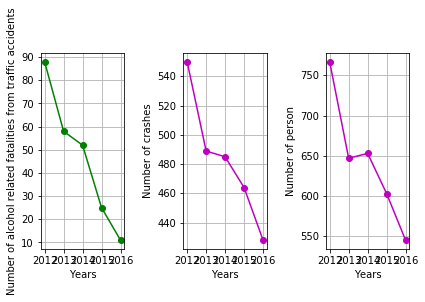

=============================| OUTLIERS |=================================
Median: 647.0 Q1: 603.0 Q3: 653.0 IQR: 50.0 

Suspected: [767]
Outliers: []


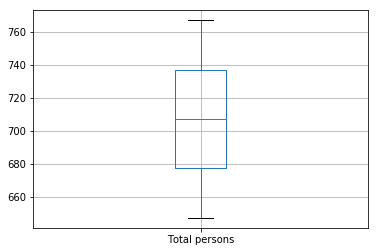

In [2]:
"""
    Crashes_Last_Five_Years.csv 
"""

# General variables 

years = np.arange(2012,2018,1) #from 2012-2017
year_str=','.join(str(i) for i in years)
list_years = []
year_str_arr=np.array([str(x) for x in year_str.split(',')])

# Import and generate basic dataframe

raw_data = pd.read_csv('Crashes_Last_Five_Years.csv')
raw_df = pd.DataFrame(raw_data)
Crashes_5years = pd.DataFrame()
# Import data into Crashes_5 years
Crashes_5years = raw_df.filter(['ACCIDENT_DATE','DAY_OF_WEEK','ACCIDENT_TIME','ALCOHOL_RELATED','ALCOHOLTIME','INJ_OR_FATAL','FATALITY','TOTAL_PERSONS'], axis=1)
Crashes_5years['INJURY'] = Crashes_5years['INJ_OR_FATAL'] - Crashes_5years['FATALITY']

# Preprocess date_time. - replace . with : and merge 'ACCIDENT_DATE' and 'ACCIDENT_TIME'
Crashes_5years['ACCIDENT_TIME'] = [x.replace('.',":") for x in Crashes_5years['ACCIDENT_TIME']]
Crashes_5years['ACCIDENT_TIME'] = Crashes_5years['ACCIDENT_DATE'].map(str) +" "+ Crashes_5years['ACCIDENT_TIME']
del(Crashes_5years['ACCIDENT_DATE'])
Crashes_5years['ACCIDENT_TIME'] = pd.to_datetime(Crashes_5years['ACCIDENT_TIME'])

# Get only alcohol related data:
filter_data = Crashes_5years[Crashes_5years['ALCOHOL_RELATED'] == 'Yes']

# Seperate pre-processed dataframe into small dataframes for each year from 2012 to 2016
for i in range(0,len(year_str_arr)):
    if i==5:
        break
    list_years.append(filter_data[(filter_data['ACCIDENT_TIME'] >= year_str_arr[i]+'-01-01') & 
                                  (filter_data['ACCIDENT_TIME'] <= year_str_arr[i+1]+'-01-01')].sort_values('ACCIDENT_TIME'))
    
year_str_arr = year_str_arr[:-1] # To make it between 2012-2016
total_year = len(year_str_arr)
# Plot dataframe
Crashes_5years_plot = pd.DataFrame()
Crashes_5years_plot['Year'] = year_str_arr
Crashes_5years_plot['ALCOHOL_FATALITY'] = [list_years[i]['FATALITY'].sum() for i in range(0,total_year)]
Crashes_5years_plot['Number_of_crashes']=[len(list_years[i]) for i in range(0,total_year)]
Crashes_5years_plot['INJ_OR_FATAL'] = [list_years[i]['INJ_OR_FATAL'].sum() for i in range(0,total_year)]
Crashes_5years_plot['INJURY'] = [list_years[i]['INJURY'].sum() for i in range(0,total_year)]
# Line graph of "Number of crashes"
plt.subplot(1,3,1)
plt.plot(Crashes_5years_plot['Year'],Crashes_5years_plot['ALCOHOL_FATALITY'],'go-')
plt.grid(True)
plt.ylabel("Number of alcohol related fatalities from traffic accidents")
plt.xlabel("Years")
# Line graph of "Number of alcohol related fatalities from traffic accident"
plt.subplot(1,3,2)
plt.plot(Crashes_5years_plot['Year'],Crashes_5years_plot['Number_of_crashes'],'mo-')
plt.grid(True)
plt.ylabel("Number of crashes")
plt.xlabel("Years")
# Total persons
plt.subplot(1,3,3)
plt.plot(Crashes_5years_plot['Year'],Crashes_5years_plot['INJ_OR_FATAL'],'mo-')
plt.grid(True)
plt.ylabel("Number of person")
plt.xlabel("Years")
# Display the graphs
plt.tight_layout()
plt.show()


# find_outlier(Crashes_5years_plot['ALCOHOL_FATALITY'],"Alcohol Fatality")
# plt.grid(True)

# find_outlier(Crashes_5years_plot['Number_of_crashes'],"Number of crashes")
# plt.grid(True)


find_outlier(Crashes_5years_plot['INJ_OR_FATAL'],"Total persons")
plt.grid(True)


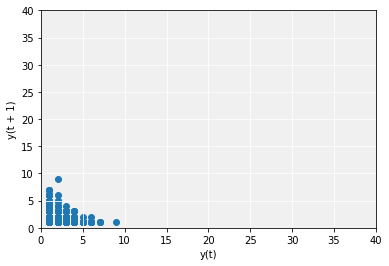

In [3]:
# Draw Lag Plot for the suspected outlier.
lag_plot(filter_data['INJ_OR_FATAL'])
plt.xlim(0, 40)
plt.ylim(0, 40)
ax = plt.gca()
ax.set_facecolor('#f0f0f0')
ax.grid(True,c="white")



In [4]:
Crashes_5years

,DAY_OF_WEEK,ACCIDENT_TIME,ALCOHOL_RELATED,ALCOHOLTIME,INJ_OR_FATAL,FATALITY,TOTAL_PERSONS,INJURY
0,Saturday,2012-05-26 11:40:00,No,No,2,0,6,2
1,Wednesday,2012-06-06 15:40:00,No,No,1,0,2,1
2,Thursday,2012-05-24 09:00:00,No,No,1,0,2,1
3,Wednesday,2012-06-06 17:02:00,No,No,1,0,5,1
4,Tuesday,2012-05-22 16:30:00,No,No,1,0,2,1
5,Wednesday,2012-06-06 18:15:00,No,Yes,1,0,2,1
6,Wednesday,2012-06-06 18:30:00,No,Yes,1,0,2,1
7,Wednesday,2012-06-06 15:00:00,No,No,1,0,3,1
8,Tuesday,2012-05-06 17:30:00,No,No,3,0,5,3
9,Wednesday,2012-06-06 16:15:00,Yes,No,1,0,2,1


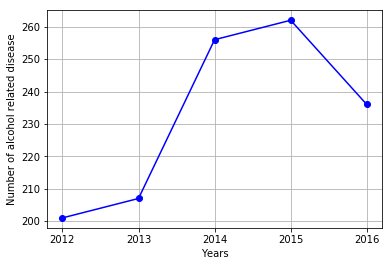

=============================| OUTLIERS |=================================
Median: 243.5 Q1: 226.5 Q3: 260.5 IQR: 34.0 

Suspected: []
Outliers: []


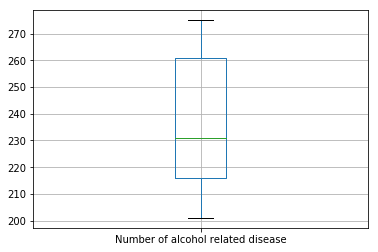

In [5]:
"""
    Underlying_causes_of_death.xls
"""
alcohol_death_df = pd.read_excel('Underlying_causes_of_death.xls')
alcohol_death_df.reset_index(level=0, inplace=True)


# Pre-process stage: Filter all the case related to alcohol.
alcohol_death = alcohol_death_df[alcohol_death_df['index'].str.contains('alcohol|Alcoholic')==True].iloc[2:]
df_cols = list(alcohol_death) # contains the column of each dataframe.
alcohol_death = remove_missing_data(alcohol_death)
for i in df_cols:
    alcohol_death = alcohol_death.rename(columns={i:get_name(i)})
    
# Seperate pre-processed dataframe into small dataframes for each year. 2012-2016

year_list = []
tot_cols = len(list(alcohol_death))
for i in np.arange(1,tot_cols,3):
    year_list.append(alcohol_death.iloc[:,i:i+3])
for i in range(0,len(year_list)):
    year_list[i]=year_list[i][year_list[i]['Total'] != 0] # Remove 0 values
"""
     year_list[0] : data for 2007
     year_list[1] : data for 2008
     year_list[2] : data for 2009
     year_list[3] : data for 2010
     year_list[4] : data for 2011
     year_list[5] : data for 2012
     year_list[6] : data for 2013
     year_list[7] : data for 2014
     year_list[8] : data for 2015
     year_list[9] : data for 2016
"""   

# Recalculate inaccurate Total values
for i in year_list:
    i['Total']=i['Males']+i['Females']
    
# Number of death by alcohol:
total_alcohol_disease=[]
for i in year_list:
    total_alcohol_disease.append(i['Total'].sum())
total_alcohol_disease_raw = total_alcohol_disease
total_alcohol_disease = total_alcohol_disease[-5:] #from 2012-2016

# Plot graph
alcohol_disease = pd.DataFrame()
alcohol_disease['Year'] = year_str_arr
alcohol_disease['Deaths'] = [i for i in total_alcohol_disease] 
plt.plot(alcohol_disease['Year'],alcohol_disease['Deaths'],'bo-')
plt.grid(True)
plt.ylabel("Number of alcohol related disease")
plt.xlabel("Years")
plt.show()

"""
    OUTLIERS FROM 2007-2016
"""
find_outlier(total_alcohol_disease_raw, 'Number of alcohol related disease')
plt.grid(True)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


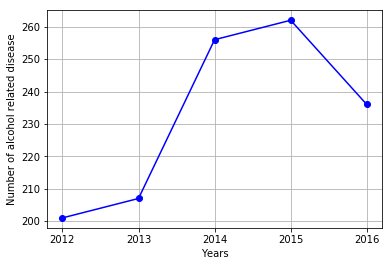

=============================| OUTLIERS |=================================
Median: 243.5 Q1: 226.5 Q3: 260.5 IQR: 34.0 

Suspected: []
Outliers: []


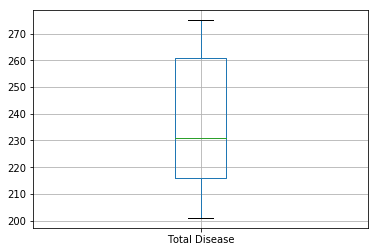

In [6]:
"""
    Underlying_causes_of_death.xls
"""
alcohol_death_df = pd.read_excel('Underlying_causes_of_death.xls')
alcohol_death_df.reset_index(level=0, inplace=True)

# Pre-process stage: Filter all the case related to alcohol.
alcohol_death = alcohol_death_df[alcohol_death_df['index'].str.contains('alcohol|Alcoholic')==True].iloc[2:]
df_cols = list(alcohol_death) # contains the column of each dataframe.
alcohol_death = remove_missing_data(alcohol_death)
for i in df_cols:
    alcohol_death = alcohol_death.rename(columns={i:get_name(i)})
    
# Seperate pre-processed dataframe into small dataframes for each year. 2012-2016

year_list = []
tot_cols = len(list(alcohol_death))
for i in np.arange(1,tot_cols,3):
    year_list.append(alcohol_death.iloc[:,i:i+3])
# for i in range(0,len(year_list)):
#     year_list[i]=year_list[i][year_list[i]['Total'] != 0] # Remove 0 values
"""
     year_list[0] : data for 2007
     year_list[1] : data for 2008
     year_list[2] : data for 2009
     year_list[3] : data for 2010
     year_list[4] : data for 2011
     year_list[5] : data for 2012
     year_list[6] : data for 2013
     year_list[7] : data for 2014
     year_list[8] : data for 2015
     year_list[9] : data for 2016
"""   

# Recalculate inaccurate Total values
for i in year_list:
    i['Total']=i['Males']+i['Females']
    
# Number of death by alcohol:
total_alcohol_disease=[]
for i in year_list:
    total_alcohol_disease.append(i['Total'].sum())
total_alcohol_disease_raw = total_alcohol_disease
total_alcohol_disease = total_alcohol_disease[-5:] #from 2012-2016

# Plot graph
alcohol_disease = pd.DataFrame()
alcohol_disease['Year'] = year_str_arr
alcohol_disease['Deaths'] = [i for i in total_alcohol_disease] 
plt.plot(alcohol_disease['Year'],alcohol_disease['Deaths'],'bo-')
plt.grid(True)
plt.ylabel("Number of alcohol related disease")
plt.xlabel("Years")
plt.show()

"""
    OUTLIERS FROM 2007-2016
"""
find_outlier(total_alcohol_disease_raw,"Total Disease")
plt.grid(True)

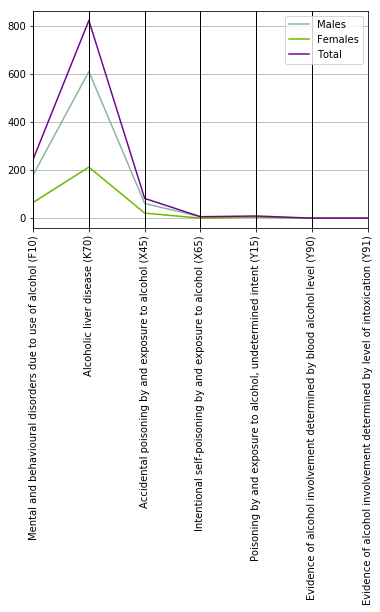

In [37]:
# parallel_coordinates(alcohol_death,'Causes')
parallel_disease = pd.DataFrame()
parallel_disease['Causes'] = alcohol_death['Causes']
parallel_disease['Males'] = year_list[5]['Males']
parallel_disease['Females'] = year_list[5]['Females']
parallel_disease['Total'] = year_list[5]['Total']


for i in range(6,len(year_list)):
    parallel_disease['Males'] += year_list[i]['Males']
    parallel_disease['Females'] += year_list[i]['Females']
    parallel_disease['Total'] += year_list[i]['Total']
parallel_disease = parallel_disease.transpose()
parallel_disease = parallel_disease.rename(columns=parallel_disease.iloc[0]).drop(parallel_disease.index[0])
parallel_disease = parallel_disease.reset_index()
parallel_coordinates(parallel_disease,'index')
plt.xticks(rotation=90)
plt.show()




In [93]:
alcohol_death

,Causes,Males,Females,Total,Males,Females,Total,Males,Females,Total,...,Total,Males,Females,Total,Males,Females,Total,Males,Females,Total
483,Mental and behavioural disorders due to use of alcohol (F10),51,11,62,64,19,83,46,20,66,...,50,34,14,48,41,15,56,38,11,49
908,Alcoholic liver disease (K70),125,36,161,131,46,177,137,37,174,...,148,143,42,185,135,50,185,108,49,157
1785,Accidental poisoning by and exposure to alcohol (X45),18,6,24,9,1,10,16,6,22,...,9,12,7,19,15,3,18,22,6,28
1807,Intentional self-poisoning by and exposure to alcohol (X65),0,2,2,1,0,1,2,4,6,...,0,2,0,2,3,0,3,1,0,1
1859,"Poisoning by and exposure to alcohol, undetermined intent (Y15)",0,2,2,4,0,4,3,0,3,...,0,2,0,2,0,0,0,0,1,1
1938,Evidence of alcohol involvement determined by blood alcohol level (Y90),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1939,Evidence of alcohol involvement determined by level of intoxication (Y91),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
F10_compare

,Deaths by (F10),Alcohol consumption per capita
0,0.000000,1.000000
1,0.600000,0.730769
2,0.466667,0.461538
3,1.000000,0.000000
4,0.533333,0.346154


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


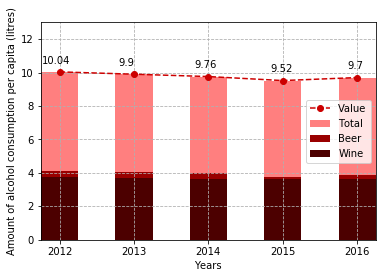

=============================| OUTLIERS |=================================
Median: 10.29 Q1: 9.99 Q3: 10.5 IQR: 0.5099999999999998 

Suspected: []
Outliers: []


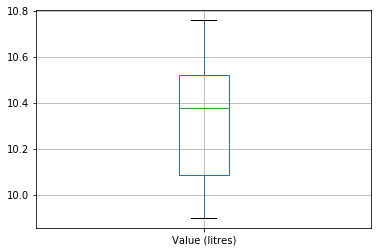

In [172]:
"""
    total_alcohol_consumption.csv
"""

# Pre-process stage:    
raw_consumption = pd.read_csv('total_alcohol_consumption.csv')
consumption = pd.DataFrame()
consumption = raw_consumption.filter(['Measure','Beverage Type','Time','Value'], axis=1)
col_list = list(consumption)
# Remove space in column names
for i in col_list:
    consumption = consumption.rename(columns={i:fix_space_column_name(i)})
# Filter data.
per_capita = consumption[consumption.Measure.str.contains('Per')==True]
per_capita_raw = per_capita
beer_capita = per_capita[per_capita['Beverage_Type']=="Beer"]
wine_capita = per_capita[per_capita['Beverage_Type']=="Wine"]

beer_capita_2007 = beer_capita[beer_capita['Time']>=2007]
wine_capita_2007 = wine_capita[wine_capita['Time']>=2007]

beer_capita_2012 = beer_capita[beer_capita['Time']>=2012]
wine_capita_2012 = wine_capita[wine_capita['Time']>=2012]

per_capita = per_capita[per_capita['Beverage_Type']=="Total all beverages"]
per_capita_r = per_capita
per_capita = per_capita[per_capita['Time']>=2012]
per_capita['Time']=year_str_arr
# Line graph + bar chart of "Amount of alcohol consumption per capita"
plt.plot(per_capita['Time'],per_capita['Value'],'o--',color="#cc0000")
plt.ylabel("Amount of alcohol consumption per capita (litres)")
plt.xlabel("Years")
alcohol_bar = plt.subplot(111)
w = 0.5
alcohol_bar.bar(year_str_arr, per_capita_bar['Value'],width=w,color="#ff7f7f", label="Total")
alcohol_bar.bar(year_str_arr, beer_capita_2012['Value'],width=w,color="#990000", label="Beer")
alcohol_bar.bar(year_str_arr, wine_capita_2012['Value'],width=w,color="#4c0000", label="Wine")
alcohol_bar.legend()
alcohol_bar.yaxis.grid(linestyle='--')
alcohol_bar.xaxis.grid(linestyle='--')
alcohol_bar.autoscale(tight=True)
alcohol_bar.set_ylim(0,13)
i = 0
for p in alcohol_bar.patches:
    if(i == 5):
        break
    i+=1
    plt.annotate(str(p.get_height()), (p.get_x() * 1.025 + 0.02, p.get_height() + 0.5))
    
# Display the graphs

plt.show()
"""
    OUTLIERS FROM 2000-2016.
"""
find_outlier(per_capita_r['Value'],"Value (litres)")
plt.grid(True)



In [130]:
ax.patches

In [10]:
"""
    Linear Correlation using Pearson method between ?? Crashes 5 years + alcohol consumption
"""

n_alcon_crashes = pd.DataFrame()
n_alcon_crashes['Litres_per_capita'] = per_capita_bar['Value']
n_alcon_crashes['Number_of_deaths'] = [i for i in Crashes_5years_plot['ALCOHOL_FATALITY']]

n_alcon_crashes = normalize_df(n_alcon_crashes)




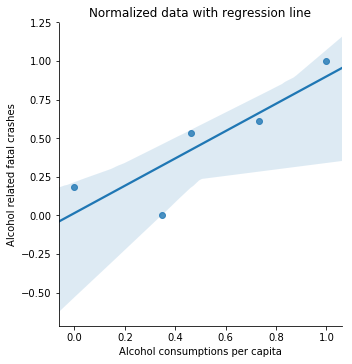

Pearson Correlation: 0.8626735120924703


In [11]:
# Scatter plot with regression line, Linear Correlation.
n_alcon_crashes = n_alcon_crashes.rename(columns={0:"Alcohol consumptions per capita",1:"Alcohol related fatal crashes"})
sns.lmplot(x="Alcohol consumptions per capita",y="Alcohol related fatal crashes",data=n_alcon_crashes,fit_reg=True) 
plt.title("Normalized data with regression line")
plt.show()
print("Pearson Correlation: " + str(np.corrcoef(n_alcon_crashes["Alcohol consumptions per capita"], n_alcon_crashes["Alcohol related fatal crashes"])[0,1]))
# Code adapted from {https://stackoverflow.com/questions/3949226/calculating-pearson-correlation-and-significance-in-python}, author: winerd

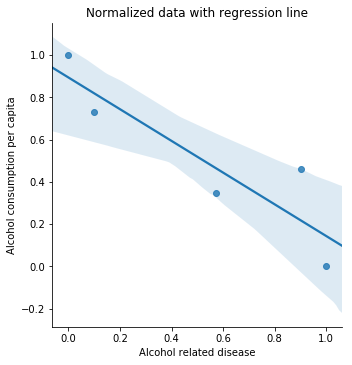

Pearson Correlation: -0.8967575970030415


In [12]:
"""
    Linear Correlation Using Pearson method between Alcohol consumption and Alcohol diseases.
"""
n_alcon_disease = pd.DataFrame()
n_alcon_disease['alcohol_disease_deaths'] = alcohol_disease['Deaths']
n_alcon_disease['alcohol_consumption'] = [i for i in per_capita_bar['Value']]
n_alcon_disease = normalize_df(n_alcon_disease)
n_alcon_disease = n_alcon_disease.rename(columns={0:"Alcohol related disease",1:"Alcohol consumption per capita"})
# Scatter plot with regression line, Linear Correlation.
sns.lmplot(x="Alcohol related disease",y="Alcohol consumption per capita",data=n_alcon_disease,fit_reg=True) 
plt.title("Normalized data with regression line")
plt.show()
print("Pearson Correlation: " + str(np.corrcoef(n_alcon_disease["Alcohol related disease"], n_alcon_disease["Alcohol consumption per capita"])[0,1]))
# Code adapted from {https://stackoverflow.com/questions/3949226/calculating-pearson-correlation-and-significance-in-python}, author: winerd



In [99]:
"""
    Each case of Alcohol disease vs Alcolhol consumption correlation?
"""
F10_index = 483 # Refer to the data.
K70_index = 908
X45_index = 1785
X65_index = 1807
Y15_index = 1859
Y90_index = 1938 ## Will return NAN because there is no record received
Y91_index = 1939 ## Will return NAN because there is no record received
Case_df = pd.DataFrame()
Case_df['Year'] = year_str_arr
Case_df['Deaths'] = 0
for i in range(0,5):
    Case_df['Deaths'][i] = year_list[i+5]['Total'][Y15_index] # Replace Y15 with the case code to see result
Case_compare = pd.DataFrame()
Case_compare['Deaths'] = Case_df['Deaths']
Case_compare['Alcohol'] = [i for i in per_capita['Value']]
Case_compare_r = Case_compare
Case_compare = normalize_df(Case_compare)
Case_compare = Case_compare.rename(columns={0:"Deaths",1:"Alcohol consumption per capita"})
print("Pearson Correlation: " + str(np.corrcoef(Case_compare["Deaths"],Case_compare['Alcohol consumption per capita'])[0,1]))

Pearson Correlation: 0.7130730027660178


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [100]:
Case_compare_r

,Deaths,Alcohol
0,6,10.04
1,0,9.90
2,2,9.76
3,0,9.52
4,1,9.70


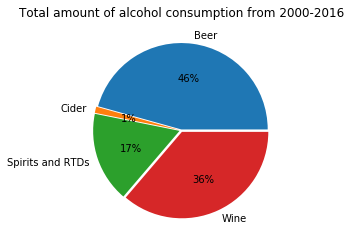

Pearson Correlation beer - total alcol (2012-2016): 0.9691694344692436
Pearson Correlation wine - total alcol (2012-2016) : 0.7862733441344578
Pearson Correlation beer - carcrash (2012-2016): 0.900004520594483
Pearson Correlation wine - carcrash (2012-2016): 0.838800458098789
Pearson Correlation beer - disease (2012-2016): -0.7689353653782834
Pearson Correlation wine - disease (2012-2016): -0.782041053900035


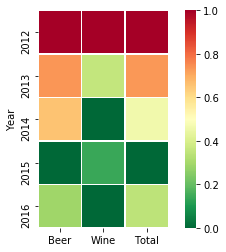

In [171]:
"""
    ACCOUNT THE MOST ALCOHOL?
"""

per_capita_compare = per_capita_raw[per_capita_raw['Beverage_Type'] != "Total all beverages"]
alcohol_pie = per_capita_compare.groupby(per_capita_compare.Beverage_Type).sum()
alcohol_pie.reset_index(level=0, inplace=True)
del(alcohol_pie['Time'])
explode = (0.01,0.02,0.02,0.02)
fig = plt.figure(figsize=(6,3))
ax = fig.add_axes((0,0,.5,1))

plt.pie(alcohol_pie['Value'],explode=explode,labels=alcohol_pie['Beverage_Type'],autopct='%1.0f%%')
plt.title('Total amount of alcohol consumption from 2000-2016')
plt.show()

"""
    BEER,WINE vs TOTAL ALCOHOL
"""

# print("Pearson Correlation beer - wine (2000-2016): " + str(np.corrcoef(beer_capita['Value'], wine_capita['Value'])[0,1]))
# print("Pearson Correlation beer - total alcol (2000-2016): " + str(np.corrcoef(beer_capita['Value'], per_capita_r['Value'])[0,1]))
# print("Pearson Correlation wine - total alcol (2000-2016) : " + str(np.corrcoef(wine_capita['Value'], per_capita_r['Value'])[0,1]))
print("Pearson Correlation beer - total alcol (2012-2016): " + str(np.corrcoef(beer_capita_2012['Value'], per_capita['Value'])[0,1]))
print("Pearson Correlation wine - total alcol (2012-2016) : " + str(np.corrcoef(wine_capita_2012['Value'], per_capita['Value'])[0,1]))



print("Pearson Correlation beer - carcrash (2012-2016): " + str(np.corrcoef(beer_capita_2012['Value'], Crashes_5years_plot['ALCOHOL_FATALITY'])[0,1]))
print("Pearson Correlation wine - carcrash (2012-2016): " + str(np.corrcoef(wine_capita_2012['Value'], Crashes_5years_plot['ALCOHOL_FATALITY'])[0,1]))


# print("Pearson Correlation beer - disease (2007-2016): " + str(np.corrcoef(beer_capita_2007['Value'], total_alcohol_disease_raw)[0,1]))
# print("Pearson Correlation wine - disease (2007-2016): " + str(np.corrcoef(wine_capita_2007['Value'], total_alcohol_disease_raw)[0,1]))

print("Pearson Correlation beer - disease (2012-2016): " + str(np.corrcoef(beer_capita_2012['Value'], total_alcohol_disease)[0,1]))
print("Pearson Correlation wine - disease (2012-2016): " + str(np.corrcoef(wine_capita_2012['Value'], total_alcohol_disease)[0,1]))




beer_wine_total = pd.DataFrame()
beer_wine_total['Beer'] = beer_capita_2012['Value']
beer_wine_total['Wine'] = [i for i in wine_capita_2012['Value']]
beer_wine_total['Total'] = [i for i in per_capita['Value']]

beer_wine_total = normalize_df(beer_wine_total)
beer_wine_total = beer_wine_total.rename(columns={0:"Beer",1:"Wine",2:"Total"})
beer_wine_total['Year'] = year_str_arr
beer_wine_total = beer_wine_total.set_index('Year')


sns.heatmap(beer_wine_total, cmap='RdYlGn_r', annot=False,square=True,linewidths=0.5)
plt.show()



In [14]:
beer_wine_total


,Beer,Wine,Total
Year,,,
2012,1.000000,1.000000,1.000000
2013,0.736842,0.357143,0.730769
2014,0.657895,0.000000,0.461538
2015,0.000000,0.142857,0.000000
2016,0.289474,0.000000,0.346154


In [15]:
"""
    LINEAR PEARSON CORRELATION ALCOHOL vs CARCRASH + DISEASE (2012-2017)
"""
sum_carcrash_disease = total_alcohol_disease + Crashes_5years_plot['ALCOHOL_FATALITY']
sum_carcrash_disease
alcohol_vs_cardisease = pd.DataFrame()
alcohol_vs_cardisease['alcohol_per_capita'] = per_capita_bar['Value']
alcohol_vs_cardisease['crash_disease_fatal'] = [i for i in sum_carcrash_disease]
alcohol_vs_cardisease = normalize_df(alcohol_vs_cardisease)
alcohol_vs_cardisease = alcohol_vs_cardisease.rename(columns={0:"Alcohol consumptions per capita",1:"Alcohol related fatal crashes and disease"})

print("Pearson Correlation ALCOHOL vs (CARCRASH + DISEASE): " + str(np.corrcoef(alcohol_vs_cardisease['Alcohol consumptions per capita'],alcohol_vs_cardisease['Alcohol related fatal crashes and disease'])[0,1]))

# NO RELATIONS

Pearson Correlation ALCOHOL vs (CARCRASH + DISEASE): 0.043755978235356374


In [ ]:
"""
    NORMAlIZED MUTUAL INFORMATION ALCOHOL vs CARCRASH + DISEASE (2012-2017)
"""
    
print("Bourndaries for 2 bins: "+str(range_of_bin(2,alcohol_vs_cardisease['Alcohol consumptions per capita'])))
alcohol_vs_cardisease["class0"] = [classify_this(i,0.5,1.0,0,0) for i in alcohol_vs_cardisease['Alcohol consumptions per capita']]
alcohol_vs_cardisease["class1"] = [classify_this(i,0.5,1.0,0,0) for i in alcohol_vs_cardisease['Alcohol related fatal crashes and disease']]

print("NMI = " + str(sm.normalized_mutual_info_score(alcohol_vs_cardisease['class0'],alcohol_vs_cardisease['class1'])))
# No relations

In [ ]:
"""
    PREDICT FUTURE of total_alcohol_disease and per_capita['Value']
"""


In [ ]:
year_list[0]['Total'].sum()

In [ ]:
total_alcohol_disease

In [ ]:
total_alcohol_disease

In [ ]:
years_07 = np.arange(2007,2017,1) #from 2007-2016
year_str_07=','.join(str(i) for i in years_07)
year_str_arr_07=np.array([str(x) for x in year_str_07.split(',')])

years_00 = np.arange(2000,2017,1) #from 2007-2016
year_str_00=','.join(str(i) for i in years_00)
year_str_arr_00=np.array([str(x) for x in year_str_00.split(',')])


year_str_arr_07
year_str_arr_00

In [ ]:
# Plot

plt.plot(year_str_arr_07,total_alcohol_disease_raw)

In [ ]:
plt.plot(year_str_arr_00,per_capita_r['Value'])